
# MedGemma: Google Model - hosted on Hugging Face
Modified from Notebook: https://github.com/Google-Health/medgemma/blob/main/notebooks/quick_start_with_hugging_face.ipynb



Tutorial: MedGemma using a chest xay stored on your local google drive. Once you can use this simple notebook, play with different models, images, system prompts, and user prompts.

Learn more about the model at the [HAI-DEF developer site](https://developers.google.com/health-ai-developer-foundations/medgemma).

###Note: Make sure you have HF_Token from huggingface so you can access all the models. Put the HF_Token into google secrets on the left - see the key.

In [2]:
import os
import sys

#google_colab = "google.colab" in sys.modules and not os.environ.get("VERTEX_PRODUCT")

from google.colab import userdata
os.environ["HF_TOKEN"] = userdata.get("HF_TOKEN")


In [3]:
#mount drive google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install dependencies

In [4]:
! pip install --upgrade --quiet accelerate bitsandbytes transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 123.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Set model variant and configuration
Note you may need to go to the model page on hugging face for google/medgemma-4b-it to get permission to use the model.

In [5]:
from transformers import BitsAndBytesConfig
import torch

model_id = f"google/medgemma-4b-it"

model_kwargs = dict(
  torch_dtype=torch.bfloat16,
  device_map="auto",
)
model_kwargs["quantization_config"] = BitsAndBytesConfig(load_in_4bit=True)

**Specify image and text inputs**

In [6]:
import os
from PIL import Image
from IPython.display import Image as IPImage, display, Markdown

**Run model with the `pipeline` API**

In [7]:
from transformers import pipeline

pipe = pipeline(
    "image-text-to-text",
    model=model_id,
    model_kwargs=model_kwargs,
)

pipe.model.generation_config.do_sample = False

config.json:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/90.6k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.64G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/70.0 [00:00<?, ?B/s]

chat_template.jinja:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

Device set to use cuda:0


#Core Question/Answer
1. Get image
2. Set up system instructions
3. Create a question- the prompt

In [16]:
#set image to an image on my google drive

image_path_in_drive = '/content/drive/MyDrive/med-gemma-colab/effusion1.jpeg' # @param {"type":"string"}
image_filename = os.path.basename(image_path_in_drive)
# Load the image using PIL
image = Image.open(image_path_in_drive)


system_instruction = "You are a Senior Emergency Physician Attending." # @param {"type":"string"}
prompt = "Describe this chest xray- patient was in an MVA with chest trauma" # @param {"type":"string"}

messages = [
    {
        "role": "system",
        "content": [{"type": "text", "text": system_instruction}]
    },
    {
        "role": "user",
        "content": [
            {"type": "text", "text": prompt},
            {"type": "image", "image": image}
        ]
    }
]



#Find the Answer using your chosen model

The following generation flags are not valid and may be ignored: ['top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.




---

**[ User ]**

Describe this chest xray- patient was in an MVA with chest trauma

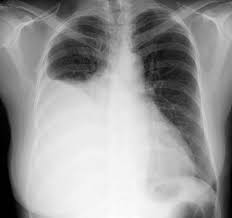



---

**[ MedGemma ]**

Okay, here's my interpretation of the chest X-ray, given the context of a motor vehicle accident (MVA) with chest trauma:

**Overall Impression:**

The X-ray shows a large opacity in the right hemithorax, obscuring the right hemidiaphragm and the right lung markings. This suggests a significant amount of fluid or solid material is present in the right pleural space.

**Specific Findings:**

*   **Right Hemithorax Opacity:** The right side of the chest is significantly denser than the left. This is most likely due to a large pleural effusion (fluid in the pleural space).
*   **Right Hemidiaphragm Elevation:** The right hemidiaphragm is elevated, which is consistent with a large pleural effusion pushing it upwards.
*   **Right Lung Compression:** The lung markings are obscured, suggesting that the fluid is compressing the lung tissue.
*   **Left Lung appears relatively normal:** The left lung appears clear, with normal lung markings and no obvious large opacities.

**Possible Diagnoses (Based on the X-ray):**

Given the clinical context of an MVA and chest trauma, the most likely diagnosis is a **hemothorax** (blood in the pleural space). However, the fluid could also be serous fluid (e.g., from a traumatic injury to the lung or mediastinum).

**Important Considerations:**

*   **Clinical History:**

---



In [17]:
output = pipe(text=messages, max_new_tokens=300)
response = output[0]["generated_text"][-1]["content"]

display(Markdown(f"\n\n---\n\n**[ User ]**\n\n{prompt}"))
display(IPImage(filename=image_path_in_drive, height=300))
display(Markdown(f"\n\n---\n\n**[ MedGemma ]**\n\n{response}\n\n---\n\n"))